# 101 Pandas Exercises for Data Analysis

## Index
#### 91. How do I use string methods in pandas?
#### 92. How do I change the data type of a pandas Series?
#### 93. When should I use a "groupby" in pandas?
#### 94. How do I explore a pandas Series?
#### 95. How do I handle missing values in pandas?
#### 96. What do I need to know about the pandas index?
#### 97. What do I need to know about the pandas index? (Part 2)
#### 98. How do I select multiple rows and columns from a pandas DataFrame? 
#### 99. When should I use the "inplace" parameter in pandas?
#### 100. How do I make my pandas DataFrame smaller and faster?


## 91. How do I use string methods in pandas?

In [1]:
import pandas as pd
import numpy as np


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# read a dataset of Chipotle orders and store the results in a DataFrame
orders = pd.read_table('chipotle.tsv')
orders.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
# string methods for pandas Series are accessed via 'str'
orders.item_name.str.upper().head()


0             CHIPS AND FRESH TOMATO SALSA
1                                     IZZE
2                         NANTUCKET NECTAR
3    CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                             CHICKEN BOWL
Name: item_name, dtype: object

In [5]:
# string method 'contains' checks for a substring and returns a boolean Series
orders.item_name.str.contains('Chicken').head()


0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [8]:
# string method 'contains' checks for a substring and returns a boolean Series
orders.item_name.str.contains('Chicken').value_counts()

False    3062
True     1560
Name: item_name, dtype: int64

In [9]:
# use the boolean Series to filter the DataFrame
orders[orders.item_name.str.contains('Chicken')].head()


,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25


In [10]:
# string methods can be chained together
orders.choice_description.str.replace('[', '').str.replace(']', '').head()


0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

In [11]:
# many pandas string methods support regular expressions (regex)
orders.choice_description.str.replace('[\[\]]', '').head()

0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

In [12]:
# Change Column Name using String Methods
orders.columns = orders.columns.str.title()
orders.columns

Index(['Order_Id', 'Quantity', 'Item_Name', 'Choice_Description',
       'Item_Price'],
      dtype='object')

## 92. How do I change the data type of a pandas Series? 

In [13]:
# read a dataset of alcohol consumption into a DataFrame, and check the data types

drinks = pd.read_csv('drinks.csv')
drinks.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [14]:
# examine the data type of each Series
drinks.dtypes


country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [15]:
# change the data type of an existing Series
drinks['beer_servings'] = drinks.beer_servings.astype(float)
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [17]:

# alternatively, change the data type of a Series while reading in a file
drinks = pd.read_csv('drinks.csv', dtype={'beer_servings':float})
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [18]:
# read a dataset of Chipotle orders and store the results in a DataFrame
orders = pd.read_table('chipotle.tsv')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [19]:
# examine the data type of each Series
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [21]:
# convert a string to a number in order to do math
orders.item_price.str.replace('$', '').astype(float).head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [22]:
orders.item_price.str.replace('$', '').astype(float).mean()

7.464335785374397

In [23]:
# string method 'contains' checks for a substring and returns a boolean Series
orders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [24]:
# convert a boolean Series to an integer (False = 0, True = 1)
orders.item_name.str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int32

## 93. When should I use a "groupby" in pandas?

In [25]:
# read a dataset of alcohol consumption into a DataFrame

drinks = pd.read_csv('drinks.csv')
drinks.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [36]:
# calculate the mean beer servings across the entire dataset
drinks.beer_servings.mean()


106.16062176165804

In [37]:
# calculate the mean beer servings just for countries in Africa
drinks[drinks.continent=='Africa'].beer_servings.mean()


61.471698113207545

In [38]:
# calculate the mean beer servings for each continent
drinks.groupby('continent').beer_servings.mean()


continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [39]:
# other aggregation functions (such as 'max') can also be used with groupby
drinks.groupby('continent').beer_servings.max()


continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [40]:
# multiple aggregation functions can be applied simultaneously
drinks.groupby('continent').beer_servings.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
continent,,,,
Africa,53,61.471698,0,376
Asia,44,37.045455,0,247
Europe,45,193.777778,0,361
North America,23,145.434783,1,285
Oceania,16,89.687500,0,306
South America,12,175.083333,93,333


In [41]:
# specifying a column to which the aggregation function should be applied is not required
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


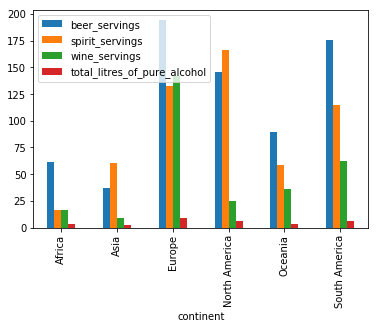

In [42]:
# side-by-side bar plot of the DataFrame directly above
drinks.groupby('continent').mean().plot(kind='bar')

## 94. How do I explore a pandas Series?

In [43]:
# read a dataset of top-rated IMDb movies into a DataFrame

movies = pd.read_csv('imdb_1000.csv')
movies.head()


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [44]:
# examine the data type of each Series
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

##### Exploring a non-numeric Series:


In [45]:
# count the non-null values, unique values, and frequency of the most common value
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [46]:
# count how many times each value in the Series occurs
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [47]:
# display percentages instead of raw counts
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

In [48]:
# 'value_counts' (like many pandas methods) outputs a Series
type(movies.genre.value_counts())

pandas.core.series.Series

In [49]:
# thus, you can add another Series method on the end
movies.genre.value_counts().head()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Name: genre, dtype: int64

In [50]:
# display the unique values in the Series
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [51]:
# count the number of unique values in the Series
movies.genre.nunique()

16

In [52]:
# compute a cross-tabulation of two Series
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


##### Exploring a numeric Series:

In [55]:
# calculate various summary statistics
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [56]:
# many statistics are implemented as Series methods
movies.duration.mean()

120.97957099080695

In [57]:
# 'value_counts' is primarily useful for categorical data, not numerical data
movies.duration.value_counts().head()

112    23
113    22
102    20
101    20
129    19
Name: duration, dtype: int64

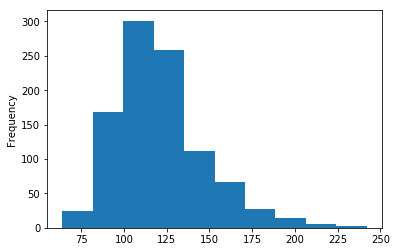

In [61]:
# histogram of the 'duration' Series (shows the distribution of a numerical variable)
movies.duration.plot(kind='hist')

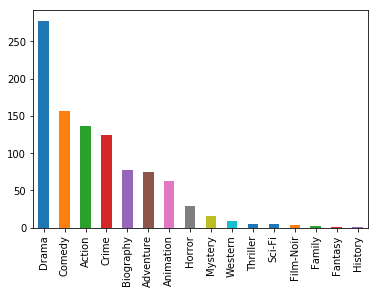

In [59]:
# bar plot of the 'value_counts' for the 'genre' Series
movies.genre.value_counts().plot(kind='bar')

## 95. How do I handle missing values in pandas?

In [79]:
# read_csv is equivalent to read_table, except it assumes a comma separator

ufo = pd.read_csv('ufo.csv')
ufo.head(20)


,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


In [64]:
# 'isnull' returns a DataFrame of booleans (True if missing, False if not missing)
ufo.isnull().head()


,City,Colors Reported,Shape Reported,State,Time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [65]:
# 'nonnull' returns the opposite of 'isnull' (True if not missing, False if missing)
ufo.notnull().head()

,City,Colors Reported,Shape Reported,State,Time
0,True,False,True,True,True
1,True,False,True,True,True
2,True,False,True,True,True
3,True,False,True,True,True
4,True,False,True,True,True


In [66]:
# count the number of missing values in each Series
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

##### This calculation works because:

The sum method for a DataFrame operates on axis=0 by default (and thus produces column sums).
In order to add boolean values, pandas converts True to 1 and False to 0.

In [67]:
# use the 'isnull' Series method to filter the DataFrame rows
ufo[ufo.City.isnull()].head()

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00


##### How to handle missing values depends on the dataset as well as the nature of your analysis. Here are some options:

In [68]:
# examine the number of rows and columns
ufo.shape

(18241, 5)

In [69]:
# if 'any' values are missing in a row, then drop that row
ufo.dropna(how='any').shape

(2486, 5)

In [70]:
# 'inplace' parameter for 'dropna' is False by default, thus rows were only dropped temporarily
ufo.shape

(18241, 5)

In [71]:
# if 'all' values are missing in a row, then drop that row (none are dropped in this case)
ufo.dropna(how='all').shape

(18241, 5)

In [72]:
# if 'any' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape

(15576, 5)

In [73]:
# if 'all' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='all').shape

(18237, 5)

In [74]:
# 'value_counts' does not include missing values by default
ufo['Shape Reported'].value_counts().head()

LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
CIRCLE      1365
Name: Shape Reported, dtype: int64

In [75]:
# explicitly include missing values
ufo['Shape Reported'].value_counts(dropna=False).head()

LIGHT       2803
NaN         2644
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

In [80]:
# fill in missing values with a specified value
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)
ufo.head(20)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


In [81]:
# confirm that the missing values were filled in
ufo['Shape Reported'].value_counts().head()

VARIOUS     2977
LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

## 96. What do I need to know about the pandas index?

In [82]:
# read a dataset of alcohol consumption into a DataFrame

drinks = pd.read_csv('drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [83]:
# every DataFrame has an index (sometimes called the "row labels")
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [84]:
# column names are also stored in a special "index" object
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [85]:
# neither the index nor the columns are included in the shape
drinks.shape

(193, 6)

In [87]:
# index and columns both default to integers if you don't define them

pd.read_table('u.user', header=None, sep='|').head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


##### What is the index used for?

identification

selection

alignment 

In [88]:
# identification: index remains with each row when filtering the DataFrame
drinks[drinks.continent=='South America']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America
52,Ecuador,162,74,3,4.2,South America
72,Guyana,93,302,1,7.1,South America
132,Paraguay,213,117,74,7.3,South America
133,Peru,163,160,21,6.1,South America
163,Suriname,128,178,7,5.6,South America


In [89]:
# selection: select a portion of the DataFrame using the index
drinks.loc[23, 'beer_servings']

245

In [90]:
# set an existing column as the index
drinks.set_index('country', inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [91]:
# 'country' is now the index
drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [92]:
# 'country' is no longer a column
drinks.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [93]:
# 'country' data is no longer part of the DataFrame contents
drinks.shape

(193, 5)

In [94]:
# country name can now be used for selection
drinks.loc['Brazil', 'beer_servings']

245

In [95]:
# index name is optional
drinks.index.name = None
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [96]:
# restore the index name, and move the index back to a column
drinks.index.name = 'country'
drinks.reset_index(inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [98]:
# many DataFrame methods output a DataFrame
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [99]:
# you can interact with any DataFrame using its index and columns
drinks.describe().loc['25%', 'beer_servings']

20.0

## 97. What do I need to know about the pandas index? (Part 2)

In [104]:
# read a dataset of alcohol consumption into a DataFrame

drinks = pd.read_csv('drinks.csv')
drinks.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [105]:
# set 'country' as the index
drinks.set_index('country', inplace=True)
drinks.head()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [106]:
# Series index is on the left, values are on the right
drinks.continent.head()

country
Afghanistan      Asia
Albania        Europe
Algeria        Africa
Andorra        Europe
Angola         Africa
Name: continent, dtype: object

In [107]:
# another example of a Series (output from the 'value_counts' method)
drinks.continent.value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [108]:
# access the Series index
drinks.continent.value_counts().index

Index(['Africa', 'Europe', 'Asia', 'North America', 'Oceania',
       'South America'],
      dtype='object')

In [109]:
# access the Series values
drinks.continent.value_counts().values

array([53, 45, 44, 23, 16, 12], dtype=int64)

In [110]:
# elements in a Series can be selected by index (using bracket notation)
drinks.continent.value_counts()['Africa']

53

In [111]:
# any Series can be sorted by its values
drinks.continent.value_counts().sort_values()

South America    12
Oceania          16
North America    23
Asia             44
Europe           45
Africa           53
Name: continent, dtype: int64

In [112]:
# any Series can also be sorted by its index
drinks.continent.value_counts().sort_index()

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [113]:
# 'beer_servings' Series contains the average annual beer servings per person
drinks.beer_servings.head()

country
Afghanistan      0
Albania         89
Algeria         25
Andorra        245
Angola         217
Name: beer_servings, dtype: int64

In [114]:
# create a Series containing the population of two countries
people = pd.Series([3000000, 85000], index=['Albania', 'Andorra'], name='population')
people

Albania    3000000
Andorra      85000
Name: population, dtype: int64

In [117]:
# calculate the total annual beer servings for each country
(drinks.beer_servings * people).head()

Afghanistan            NaN
Albania        267000000.0
Algeria                NaN
Andorra         20825000.0
Angola                 NaN
dtype: float64

#### The two Series were aligned by their indexes.
####  If a value is missing in either Series, the result is marked as NaN.
#### Alignment enables us to easily work with incomplete data

In [118]:
# concatenate the 'drinks' DataFrame with the 'population' Series (aligns by the index)
pd.concat([drinks, people], axis=1).head()

D:\Program_Files\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,population
Afghanistan,0,0,0,0.0,Asia,NaN
Albania,89,132,54,4.9,Europe,3000000.0
Algeria,25,0,14,0.7,Africa,NaN
Andorra,245,138,312,12.4,Europe,85000.0
Angola,217,57,45,5.9,Africa,NaN


## 98. How do I select multiple rows and columns from a pandas DataFrame? 

In [121]:
# read_csv  assumes a comma separator

ufo = pd.read_csv('ufo.csv')
ufo.head()


,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


#### The loc method is used to select rows and columns by label. You can pass it:

#### A single label
#### A list of labels
#### A slice of labels
#### A boolean Series
#### A colon (which indicates "all labels")

In [122]:
# row 0, all columns
ufo.loc[0, :]


City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [123]:
# rows 0 and 1 and 2, all columns
ufo.loc[[0, 1, 2], :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [124]:
# rows 0 through 2 (inclusive), all columns
ufo.loc[0:2, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [125]:
# this implies "all columns", but explicitly stating "all columns" is better
ufo.loc[0:2]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [126]:
# rows 0 through 2 (inclusive), column 'City'
ufo.loc[0:2, 'City']

0         Ithaca
1    Willingboro
2        Holyoke
Name: City, dtype: object

In [127]:
# rows 0 through 2 (inclusive), columns 'City' and 'State'
ufo.loc[0:2, ['City', 'State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO


In [128]:
# accomplish the same thing using double brackets - but using 'loc' is preferred since it's more explicit
ufo[['City', 'State']].head(3)

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO


In [129]:
# rows 0 through 2 (inclusive), columns 'City' through 'State' (inclusive)
ufo.loc[0:2, 'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [130]:
# accomplish the same thing using 'head' and 'drop'
ufo.head(3).drop('Time', axis=1)

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [131]:
# rows in which the 'City' is 'Oakland', column 'State'
ufo.loc[ufo.City=='Oakland', 'State']

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

In [132]:
# accomplish the same thing using "chained indexing" - but using 'loc' is preferred since chained indexing can cause problems
ufo[ufo.City=='Oakland'].State

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

#### The iloc method is used to select rows and columns by integer position. You can pass it:

#### - A single integer position
#### - A list of integer positions
#### - A slice of integer positions
#### - A colon (which indicates "all integer positions")

In [133]:
# rows in positions 0 and 1, columns in positions 0 and 3
ufo.iloc[[0, 1], [0, 3]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ


In [135]:
# rows in positions 0 through 2 (exclusive), columns in positions 0 through 4 (exclusive)
ufo.iloc[0:2, 0:4]

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ


In [136]:
# rows in positions 0 through 2 (exclusive), all columns
ufo.iloc[0:2, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [137]:
# accomplish the same thing - but using 'iloc' is preferred since it's more explicit
ufo[0:2]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


## 99. When should I use the "inplace" parameter in pandas?

In [138]:
# read_csv  assumes a comma separator

ufo = pd.read_csv('ufo.csv')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [139]:
ufo.shape

(18241, 5)

In [140]:
# remove the 'City' column (doesn't affect the DataFrame since inplace=False)
ufo.drop('City', axis=1).head()

,Colors Reported,Shape Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00
2,NaN,OVAL,CO,2/15/1931 14:00
3,NaN,DISK,KS,6/1/1931 13:00
4,NaN,LIGHT,NY,4/18/1933 19:00


In [141]:
# confirm that the 'City' column was not actually removed
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [142]:
# remove the 'City' column (does affect the DataFrame since inplace=True)
ufo.drop('City', axis=1, inplace=True)

In [143]:
# confirm that the 'City' column was actually removed
ufo.head()

,Colors Reported,Shape Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00
2,NaN,OVAL,CO,2/15/1931 14:00
3,NaN,DISK,KS,6/1/1931 13:00
4,NaN,LIGHT,NY,4/18/1933 19:00


In [144]:
# drop a row if any value is missing from that row (doesn't affect the DataFrame since inplace=False)
ufo.dropna(how='any').shape

(2490, 4)

In [145]:
# confirm that no rows were actually removed
ufo.shape

(18241, 4)

In [146]:
# use an assignment statement instead of the 'inplace' parameter
ufo = ufo.set_index('Time')
ufo.tail()

,Colors Reported,Shape Reported,State
Time,,,
12/31/2000 23:00,NaN,TRIANGLE,IL
12/31/2000 23:00,NaN,DISK,IA
12/31/2000 23:45,NaN,NaN,WI
12/31/2000 23:45,RED,LIGHT,WI
12/31/2000 23:59,NaN,OVAL,FL


In [147]:
# fill missing values using "backward fill" strategy (doesn't affect the DataFrame since inplace=False)
ufo.fillna(method='bfill').tail()

,Colors Reported,Shape Reported,State
Time,,,
12/31/2000 23:00,RED,TRIANGLE,IL
12/31/2000 23:00,RED,DISK,IA
12/31/2000 23:45,RED,LIGHT,WI
12/31/2000 23:45,RED,LIGHT,WI
12/31/2000 23:59,NaN,OVAL,FL


In [148]:
# compare with "forward fill" strategy (doesn't affect the DataFrame since inplace=False)
ufo.fillna(method='ffill').tail()

,Colors Reported,Shape Reported,State
Time,,,
12/31/2000 23:00,RED,TRIANGLE,IL
12/31/2000 23:00,RED,DISK,IA
12/31/2000 23:45,RED,DISK,WI
12/31/2000 23:45,RED,LIGHT,WI
12/31/2000 23:59,RED,OVAL,FL


## 100. How do I make my pandas DataFrame smaller and faster?

In [149]:
# read a dataset of alcohol consumption into a DataFrame, and check the data types

drinks = pd.read_csv('drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [150]:
# exact memory usage is unknown because object columns are references elsewhere
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [151]:
# force pandas to calculate the true memory usage
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 30.4 KB


In [152]:
# calculate the memory usage for each Series (in bytes)
drinks.memory_usage(deep=True)


Index                              80
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                       12332
dtype: int64

In [153]:
# use the 'category' data type (new in pandas 0.15) to store the 'continent' strings as integers
drinks['continent'] = drinks.continent.astype('category')
drinks.dtypes

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [155]:
# 'continent' Series appears to be unchanged
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: category
Categories (6, object): [Africa, Asia, Europe, North America, Oceania, South America]

In [156]:
# strings are now encoded (0 means 'Africa', 1 means 'Asia', 2 means 'Europe', etc.)
drinks.continent.cat.codes.head()

0    1
1    2
2    0
3    2
4    0
dtype: int8

In [157]:
# memory usage has been drastically reduced
drinks.memory_usage(deep=True)

Index                              80
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [158]:
# repeat this process for the 'country' Series
drinks['country'] = drinks.country.astype('category')
drinks.memory_usage(deep=True)

Index                              80
country                         18094
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [159]:
# memory usage increased because we created 193 categories
drinks.country.cat.categories

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=193)

### The category data type should only be used with a string Series that has a small number of possible values.

In [160]:
# create a small DataFrame from a dictionary
df = pd.DataFrame({'ID':[100, 101, 102, 103], 'quality':['good', 'very good', 'good', 'excellent']})
df

,ID,quality
0,100,good
1,101,very good
2,102,good
3,103,excellent


In [161]:
# sort the DataFrame by the 'quality' Series (alphabetical order)
df.sort_values('quality')

,ID,quality
3,103,excellent
0,100,good
2,102,good
1,101,very good


In [167]:
# define a logical ordering for the categories
df['quality'] = df.quality.astype('category', categories=['good', 'very good', 'excellent'], ordered=True)
df.quality

D:\Program_Files\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


0         good
1    very good
2         good
3    excellent
Name: quality, dtype: category
Categories (3, object): [good < very good < excellent]

In [168]:
# sort the DataFrame by the 'quality' Series (logical order)
df.sort_values('quality')

,ID,quality
0,100,good
2,102,good
1,101,very good
3,103,excellent


In [169]:
# comparison operators work with ordered categories
df.loc[df.quality > 'good', :]

,ID,quality
1,101,very good
3,103,excellent
